# K -Means 

In [1]:
#Importing the rquired Library

import random as rn
import numpy as np
import pandas as pd
from matplotlib.pyplot import scatter

In [2]:
# creating virtual Instances of data with 2 attributes for clustering

data = []
for i in range(200):
    x = list(np.random.randint(0,1000,2))
    data.append(x)

In [3]:
'''Finding bettr initial seeds for avoiding outliers
data = the whole data
K = number of seeds wanted
lst = a list of list conating k intial seed
'''

def initialK(data,K):
    lst = []
    a = np.random.randint(0,len(data))
    lst.append(data[a])
    dis = np.zeros(len(data))
    for j in range(K-1):
        for i in range(len(data)):
            dis[i]+= distance(lst[len(lst)-1],data[i])
        a = np.argmax(dis)
        lst.append(data[a])
    return lst

In [4]:
'''Finding Ecludian distance between two data points
x = first data point
y = second data point
d = Ecludian distance between x and y'''

def distance(x,y):
    d = 0
    for i in range(len(x)):
        d += (x[i] - y[i])**2
    d = np.sqrt(d)
    return d

In [5]:
'''calculate centroid of clustered points
X = data points in the cluster
c = indecies of the point that are in cluster X
s = cenroid of the cluster'''

def cal_mean(X,c):
    n = len(c)
    s = [0]*len(X[0])
    for i in range(n):
        for j in range(len(X[0])):
            s[j]+=X[c[i]][j]
    for j in range(len(X[0])):
        s[j]/=n
    return s

In [6]:
'''Finding clusters in data
X = Entire data set
k = no. of clusters
maxiter= no of Iteration to be performed to converge
cluster = index of each clusters'''

def kmeans(X,k,maxiter=100):      
    lst = initialK(X,k)
    for lp in range(maxiter):
        cluster = []  
        for i in range(k):
            cluster.append([])
        for i in range(len(X)):
            min_idx = 0
            min_dis=999999
            for j in range(k):
                d = distance(lst[j],X[i])
                if d<min_dis:
                    min_idx = j
                    min_dis = d
            cluster[min_idx].append(i)
        for i in range(k):
            if(len(cluster[i])!=0):
                lst[i] = cal_mean(X,cluster[i])
    return cluster
    

In [7]:
'''Finding the clusters'''

res = kmeans(data,6,maxiter=10)

# plotting the clusters

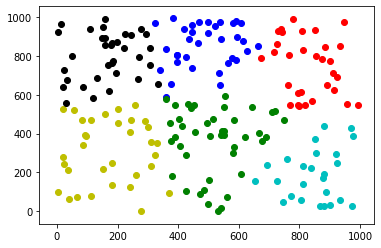

In [8]:
import matplotlib.pyplot as plt
color = ['b','g','r','y','c','k','m']
fig = plt.figure()
ax  = fig.add_subplot(111)
for i in range(len(res)):
    lst = []
    col = color[i]
    for j in range(len(res[i])):
        lst.append(data[res[i][j]])
    lst = pd.DataFrame(lst)
    ax.scatter(lst[0],lst[1],c=col)
plt.show()